In [25]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from copy import deepcopy

In [138]:
def random_date_within_5_years():
    today = datetime.now()
    start_date = today - timedelta(days=5*365)

    # Tirer un nombre de jours au hasard entre start et aujourd'hui
    random_days = random.randint(0, (today - start_date).days)
    return (start_date + timedelta(days=random_days)).strftime("%Y-%m-%d")


def draw_team_size():
    possible_sizes = list(range(2, 16))  # from 2 to 15
    # Probabilités décroissantes (favorise les petites équipes)
    weights = [8, 10, 12, 20, 15, 8, 6, 5, 4, 3, 2, 1, 1, 0.5]  # len = 14
    return random.choices(possible_sizes, weights=weights, k=1)[0]

In [151]:
user_names = [
    # Harry Potter
    "Hermione Granger", "Luna Lovegood", "Sirius Black", "Remus Lupin", "Ginny Weasley",
    "Albus Dumbledore", "Minerva McGonagall", "Severus Snape", "Draco Malfoy", "Bellatrix Lestrange",

    # Seigneur des Anneaux
    "Aragorn Elessar", "Legolas Greenleaf", "Arwen Undómiel", "Galadriel Celeborn", "Elrond Half-elven",
    "Faramir Ithilien", "Éowyn Dernhelm", "Gimli Glóin", "Frodo Baggins", "Samwise Gamgee",

    # The Witcher
    "Geralt of Rivia", "Yennefer Vengerberg", "Ciri Cintra", "Triss Merigold", "Jaskier Pankratz",
    "Vesemir KaerMorhen", "Dandelion Lute", "Emhyr var Emreis", "Fringilla Vigo", "Tissaia de Vries",

    # League of Legends
    "Jinx Zaun", "Vi Piltover", "Ekko Z-Drive", "Ahri Vastaya", "Yasuo Nomad",
    "Zed Shadow", "Lux Crownguard", "Kayle Justice", "Thresh Lantern", "Viego RuinedKing",

    # Comics (Marvel / DC)
    "Peter Parker", "Tony Stark", "Natasha Romanoff", "Bruce Wayne", "Clark Kent",
    "Diana Prince", "Stephen Strange", "Wanda Maximoff", "Harley Quinn", "Barry Allen",
    "Peter Quill", "Gamora Zen", "Drax Destroyer", "Rocket Raccoon", "Groot Flora",
    "Nebula Cyber", "Yondu Udonta", "Mantis Empath", "Kraglin Obfonteri", "Cosmo Dog",

    # Jeux vidéo
    "Aloy Horizon", "Link Hyrule", "Zelda Nox", "Kratos Sparta", "Ellie Firefly",
    "Joel Outbreak", "Cloud Strife", "Tifa Lockhart", "Lara Croft", "Shepard N7",

    # Game of Thrones
    "Arya Stark", "Jon Snow", "Daenerys Targaryen", "Tyrion Lannister", "Brienne of Tarth",
    "Cersei Lannister", "Sansa Stark", "Jorah Mormont", "Sandor Clegane", "Theon Greyjoy",

    # The Walking Dead
    "Rick Grimes", "Daryl Dixon", "Carol Peletier", "Negan Smith", "Michonne Hawthorne",
    "Glenn Rhee", "Maggie Greene", "Carl Grimes", "Hershel Greene", "Rosita Espinosa",

    # The Big Bang Theory
    "Sheldon Cooper", "Leonard Hofstadter", "Penny", "Howard Wolowitz", "Raj Koothrappali",
    "Amy Farrah Fowler", "Bernadette Rostenkowski", "Stuart Bloom", "Leslie Winkle", "Barry Kripke",

    # Star Wars
    "Ahsoka Tano", "Obi-Wan Kenobi", "Leia Organa", "Din Djarin", "Cassian Andor",
    "Grogu Mando", "Kylo Ren", "Mace Windu", "Poe Dameron", "Jyn Erso",

    # Assassin's Creed
    "Ezio Auditore", "Altaïr Ibn-LaʼAhad", "Kassandra Sparta", "Eivor Wolf-Kissed", "Basim Hidden",
    "Bayek Siwa", "Arno Dorian", "Jacob Frye", "Evie Frye", "Desmond Miles",

    # Doctor Who
    "Rose Tyler", "Martha Jones", "Donna Noble", "Amy Pond", "River Song",
    "Clara Oswald", "Rory Williams", "The Doctor", "Jack Harkness", "Missy Saxon",

    # Retour vers le futur
    "Marty McFly", "Doc Brown", "Jennifer Parker", "Biff Tannen", "George McFly",

    # Jurassic Park (1993)
    #I'm one of those people who snub the other Jurassic Park movies 😏🦖
    "Alan Grant", "Ellie Sattler", "Ian Malcolm", "John Hammond", "Lex Murphy",
    "Tim Murphy", "Donald Gennaro", "Robert Muldoon", "Ray Arnold", "Dennis Nedry",
    
        # Les Visiteurs (🇫🇷 Cult French film from the 90s 😄)
    "Godefroy Montmirail", "Jacquouille Fripouille", "Béatrice Montmirail",
    "Jean-Pierre Goulard", "Ginette la clocharde","Jacques-Henri Jacquard"
    
]


In [142]:
# Create a synthetic team configuration based on typical usage behaviors
def create_team_config(team_name):
    actions = [
        "Export", "Basic search", "Workspace", "Visit page type A",
        "Visit page type B", "Visit page type C", "Articles", "Display on map",
        "Similarity search","Chatbot"
    ]
    
    # Define team size
    num_members = draw_team_size()

    # Determine how many members are active
    min_active = max(1, int(0.25 * num_members))
    max_active = int(0.75 * num_members)
    num_active = random.randint(min_active, max_active)
    
    # Randomly assign super users (more likely to be True)
    has_super_user = random.choices([False, True], weights=[1, 2])[0]
    num_super_users = random.randint(1, num_active) if has_super_user else 0
    
    # Define favorite actions for this team (bias the activity simulation later)
    num_fav_actions = random.randint(1, 4)
    fav_actions = random.sample(actions, num_fav_actions)

    # Return config as a dictionary with the team name as key
    return {
        team_name: {
            "effectif": num_members,               # Total number of members
            "actifs_member": num_active,           # Number of active members
            "super_users": num_super_users,        # Number of super users
            "creation_date": random_date_within_5_years(),  # Date team was created
            "fav_activities": fav_actions           # Favorite activities (biased action generation)
        }
    }



In [143]:
def simulate_user_activity(user_id, team_id, team_name, is_super_user, fav_actions, start_date=None, activity_level=None):
    all_actions = [
        "Export", "Basic search", "Workspace", "Visit page type A",
        "Visit page type B", "Visit page type C", "Articles", "Display on map",
        "Similarity search","Chatbot"
    ]

    if start_date is None:
        start_date = datetime.now() - timedelta(days=150)  # ~5 months
    else:
        start_date = pd.to_datetime(start_date)

    end_date = datetime.now()
    num_days = (end_date - start_date).days

    # Set activity level if not specified
    if not activity_level:
        activity_level = random.choice(["low", "medium", "high"])

    # Define login probabilities
    if is_super_user:
        login_prob = 0.6
    elif activity_level == "high":
        login_prob = 0.35
    elif activity_level == "medium":
        login_prob = 0.2
    else:
        login_prob = 0.05

   #-----------------------------------------------
    # Create weighted action pool
    weighted_pool = []
    # Weight fav_actions based on position: first gets most weight
    max_weight = len(fav_actions)+1
    for i, action in enumerate(fav_actions):
        weight = max_weight - i
        weighted_pool.extend([action] * weight)

    # Add all other actions with base weight = 1
    for action in all_actions:
        if action not in fav_actions:
            weighted_pool.append(action)
            
    data = []
    for day_offset in range(num_days + 1):
        current_day = start_date + timedelta(days=day_offset)

        if random.random() < login_prob:
            num_actions = random.randint(1, 5)
            for _ in range(num_actions):
                # Weighted action choice: more likely to pick from favorites
                action = random.choice(weighted_pool)

               
                action_datetime = current_day.strftime("%Y-%m-%d") #+ random_time

                data.append({
                    "team_id": team_id,
                    "team_name": team_name,
                    "user_id": user_id,
                    "action": action,
                    "action_date": action_datetime
                })

    return data, current_day


In [152]:
def generate_team_with_activity(team_name, team_id, available_names, start_date=None):
    # 1. Generate team configuration (members, activity levels, favorite actions, etc.)
    team_config = create_team_config(team_name)[team_name]

    n_users = team_config["effectif"]
    n_active = team_config["actifs_member"]
    n_super = team_config["super_users"]
    fav_actions = team_config["fav_activities"]
    creation_date = team_config["creation_date"]
    team_logs = []
    team_table = []
    for i in range(n_users):
        # 2. Draw a unique name from the available pool
        if not available_names:
            raise ValueError("No more available names!")
        full_name = available_names.pop(random.randint(0, len(available_names)-1))
        name_clean = full_name.lower().replace(" ", "-")
        user_id = f"{name_clean}__{random.randint(10,99)}"

        # 3. Define user role: super_user, active, or inactive
        is_super_user = i < n_super
        is_active = i < n_active

        # 4. Assign activity level
        if is_super_user:
            activity_level = "high"
        elif is_active:
            activity_level = random.choices(["low", "medium", "high"], weights=[3, 5, 2])[0]
        else:
            activity_level = "low"

        # 5. Simulate this user's activity logs
        logs,last_day = simulate_user_activity(
            user_id=user_id,
            team_id=team_id,
            team_name=team_name,
            is_super_user=is_super_user,
            fav_actions=fav_actions,
            start_date=creation_date,
            activity_level=activity_level
        )

        # Collect logs
        team_logs.extend(logs)
        team_table.append({'team_id':team_id, 'team_name':team_name,
                       'user_id':user_id, 'join_date':creation_date,
                       'last_login_date':last_day,'user':full_name})
    
    df_team_logs = pd.DataFrame(team_logs)
    # Extract team-level metadata
    if not df_team_logs.empty:
        last_action_date = pd.to_datetime(df_team_logs["action_date"]).max().date()
        last_move_date = str(max(last_action_date, datetime.strptime(team_config["creation_date"], "%Y-%m-%d").date()))
    else:
        last_action_date = None
        last_move_date = join_date
    print({
        "team_id": team_id,
        "team_name": team_name,
        "effectif": n_users,
        "join_date": creation_date,
        "last_login_date": str(last_action_date),
        "last_action_date": str(last_action_date),
        "last_move_date": last_move_date
    })
    df_team_global = pd.DataFrame([{
        "team_id": team_id,
        "team_name": team_name,
        "effectif": n_users,
        "join_date": creation_date,
        "last_login_date": str(last_action_date),
        "last_action_date": str(last_action_date),
        "last_move_date": last_move_date
    }])
            #df              #df 1row     list of dict
    return df_team_logs, df_team_global, team_table

In [153]:
from copy import deepcopy

# Exemple de 15 noms d'équipe
team_names = [
    "Alpha", "Beta", "Gamma", "Delta", "Epsilon", "Zeta", "Eta", "Theta",
    "Iota", "Kappa", "Lambda", "Mu", "Nu", "Xi", "Omicron"
]
df_team_logs, df_team_global, team_table = pd.DataFrame(), pd.DataFrame(),list()
# Cloner la liste de noms pour la préserver
names_pool = deepcopy(user_names)


# Boucle de génération
for i, team_name in enumerate(team_names, start=1):
    print(i,"/ 15")
    log ,global_info,table = generate_team_with_activity(team_name, i, names_pool)
    df_team_logs = pd.concat([df_team_logs,log])
    df_team_global = pd.concat([df_team_global,global_info])
    team_table.extend(table)
team_table = pd.DataFrame(team_table)

1 / 15
{'team_id': 1, 'team_name': 'Alpha', 'effectif': 3, 'join_date': '2024-03-20', 'last_login_date': '2025-05-12', 'last_action_date': '2025-05-12', 'last_move_date': '2025-05-12'}
2 / 15
{'team_id': 2, 'team_name': 'Beta', 'effectif': 8, 'join_date': '2020-05-21', 'last_login_date': '2025-05-13', 'last_action_date': '2025-05-13', 'last_move_date': '2025-05-13'}
3 / 15
{'team_id': 3, 'team_name': 'Gamma', 'effectif': 3, 'join_date': '2023-08-25', 'last_login_date': '2025-05-13', 'last_action_date': '2025-05-13', 'last_move_date': '2025-05-13'}
4 / 15
{'team_id': 4, 'team_name': 'Delta', 'effectif': 8, 'join_date': '2025-02-25', 'last_login_date': '2025-05-13', 'last_action_date': '2025-05-13', 'last_move_date': '2025-05-13'}
5 / 15
{'team_id': 5, 'team_name': 'Epsilon', 'effectif': 2, 'join_date': '2023-12-16', 'last_login_date': '2025-05-13', 'last_action_date': '2025-05-13', 'last_move_date': '2025-05-13'}
6 / 15
{'team_id': 6, 'team_name': 'Zeta', 'effectif': 6, 'join_date': '20

In [167]:
df_team_global.head()

,team_id,team_name,effectif,join_date,last_login_date,last_action_date,last_move_date
0,1,Alpha,3,2024-03-20,2025-05-12,2025-05-12,2025-05-12
0,2,Beta,8,2020-05-21,2025-05-13,2025-05-13,2025-05-13
0,3,Gamma,3,2023-08-25,2025-05-13,2025-05-13,2025-05-13
0,4,Delta,8,2025-02-25,2025-05-13,2025-05-13,2025-05-13
0,5,Epsilon,2,2023-12-16,2025-05-13,2025-05-13,2025-05-13


In [168]:
team_table.head()

,team_id,team_name,user_id,join_date,last_login_date,user
0,1,Alpha,1,2024-03-20,2025-05-13,Sandor Clegane
1,1,Alpha,2,2024-03-20,2025-05-13,Tyrion Lannister
2,1,Alpha,3,2024-03-20,2025-05-13,Amy Pond
3,2,Beta,4,2020-05-21,2025-05-13,Éowyn Dernhelm
4,2,Beta,5,2020-05-21,2025-05-13,Kylo Ren


In [169]:
df_team_logs.head()

,team_id,team_name,user_id,action,action_date,month
0,1,Alpha,1,Similarity search,2024-03-23,2024-03
1,1,Alpha,1,Display on map,2024-03-24,2024-03
2,1,Alpha,1,Workspace,2024-03-24,2024-03
3,1,Alpha,1,Export,2024-04-03,2024-04
4,1,Alpha,1,Articles,2024-04-03,2024-04


In [157]:
user_id_table = dict()
for i,name in enumerate(team_table["user_id"].unique()):
    user_id_table[name] = i+1
team_table["user_id"] = team_table["user_id"].apply(lambda x : user_id_table[x])
df_team_logs["user_id"] = df_team_logs["user_id"].apply(lambda x : user_id_table[x])

Mean actions/month/user: 17.40
Median: 6.355769230769231
Q1: 5.279761904761905
Q3: 27.5


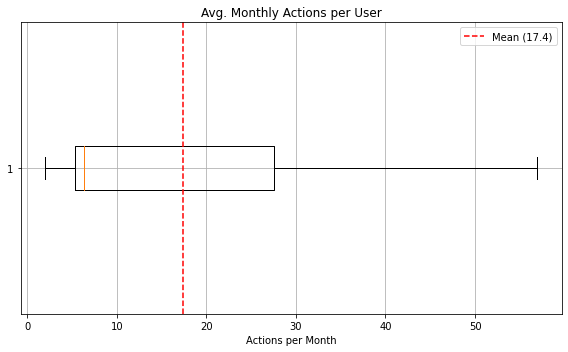

In [162]:
import matplotlib.pyplot as plt
import pandas as pd


# Étape 1 : conversion de action_date en datetime
df_team_logs["action_date"] = pd.to_datetime(df_team_logs["action_date"])

# Étape 2 : création d'une colonne "month"
df_team_logs["month"] = df_team_logs["action_date"].dt.to_period("M")

# Étape 3 : nombre d’actions par user et par mois
monthly_actions = df_team_logs.groupby(["user_id", "month"])["action"].count().reset_index(name="num_actions")

# Étape 4 : stats par user → moyenne mensuelle d’activité
user_monthly_avg = monthly_actions.groupby("user_id")["num_actions"].mean()

# Étape 5 : statistiques globales
mean_val = user_monthly_avg.mean()
median_val = user_monthly_avg.median()
q1 = user_monthly_avg.quantile(0.25)
q3 = user_monthly_avg.quantile(0.75)

print(f"Mean actions/month/user: {mean_val:.2f}")
print(f"Median: {median_val}")
print(f"Q1: {q1}")
print(f"Q3: {q3}")

# Étape 6 : visualisation (boxplot)
plt.figure(figsize=(8, 5))
plt.boxplot(user_monthly_avg, vert=False)
plt.axvline(mean_val, color="red", linestyle="--", label=f"Mean ({mean_val:.1f})")
plt.title("Avg. Monthly Actions per User")
plt.xlabel("Actions per Month")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [171]:
from pathlib import Path
CACHE_DIR = Path("data_cache")
team_table.to_parquet(CACHE_DIR / "teams.parquet", index=False)
df_team_logs.to_parquet(CACHE_DIR / "actions.parquet", index=False)
df_team_global.to_parquet(CACHE_DIR / "global.parquet", index=False)